## Live feed in the terminal

In [1]:
import numpy as np
import time

# Initialize parameters
sampling_rate = 1000
window_size = 1000  # Number of samples in each window
update_interval = 1  # Interval in seconds

# Initialize data
emg_data = np.random.rand(window_size)

# Function to update and print frequencies
def update():
    global emg_data

    while True:
        # Simulate new data acquisition
        new_data = np.random.rand(10)  # Simulate 10 new data points
        emg_data = np.concatenate((emg_data[10:], new_data))

        # Compute FFT and power spectrum
        n = len(emg_data)
        frequencies = np.fft.rfftfreq(n, d=1/sampling_rate)
        fft_magnitude = np.abs(np.fft.rfft(emg_data))
        power_spectrum = fft_magnitude ** 2

        # Calculate mean and median frequencies
        mean_frequency = np.sum(frequencies * power_spectrum) / np.sum(power_spectrum)
        cumulative_power = np.cumsum(power_spectrum)
        total_power = cumulative_power[-1]
        median_frequency = frequencies[np.where(cumulative_power >= total_power/2)[0][0]]

        # Print mean and median frequencies
        print(f"Mean Frequency: {mean_frequency:.2f} Hz, Median Frequency: {median_frequency:.2f} Hz")

        # Wait for the next update
        time.sleep(update_interval)

# Start the update loop
update()

Mean Frequency: 39.06 Hz, Median Frequency: 0.00 Hz
Mean Frequency: 38.83 Hz, Median Frequency: 0.00 Hz
Mean Frequency: 38.86 Hz, Median Frequency: 0.00 Hz
Mean Frequency: 38.62 Hz, Median Frequency: 0.00 Hz
Mean Frequency: 38.96 Hz, Median Frequency: 0.00 Hz
Mean Frequency: 38.84 Hz, Median Frequency: 0.00 Hz
Mean Frequency: 38.73 Hz, Median Frequency: 0.00 Hz
Mean Frequency: 38.96 Hz, Median Frequency: 0.00 Hz
Mean Frequency: 38.75 Hz, Median Frequency: 0.00 Hz
Mean Frequency: 38.23 Hz, Median Frequency: 0.00 Hz
Mean Frequency: 38.19 Hz, Median Frequency: 0.00 Hz
Mean Frequency: 38.22 Hz, Median Frequency: 0.00 Hz
Mean Frequency: 38.32 Hz, Median Frequency: 0.00 Hz
Mean Frequency: 38.50 Hz, Median Frequency: 0.00 Hz
Mean Frequency: 37.76 Hz, Median Frequency: 0.00 Hz
Mean Frequency: 37.85 Hz, Median Frequency: 0.00 Hz
Mean Frequency: 37.79 Hz, Median Frequency: 0.00 Hz
Mean Frequency: 37.62 Hz, Median Frequency: 0.00 Hz
Mean Frequency: 37.27 Hz, Median Frequency: 0.00 Hz
Mean Frequen

KeyboardInterrupt: 

## FFT compute for centered signals

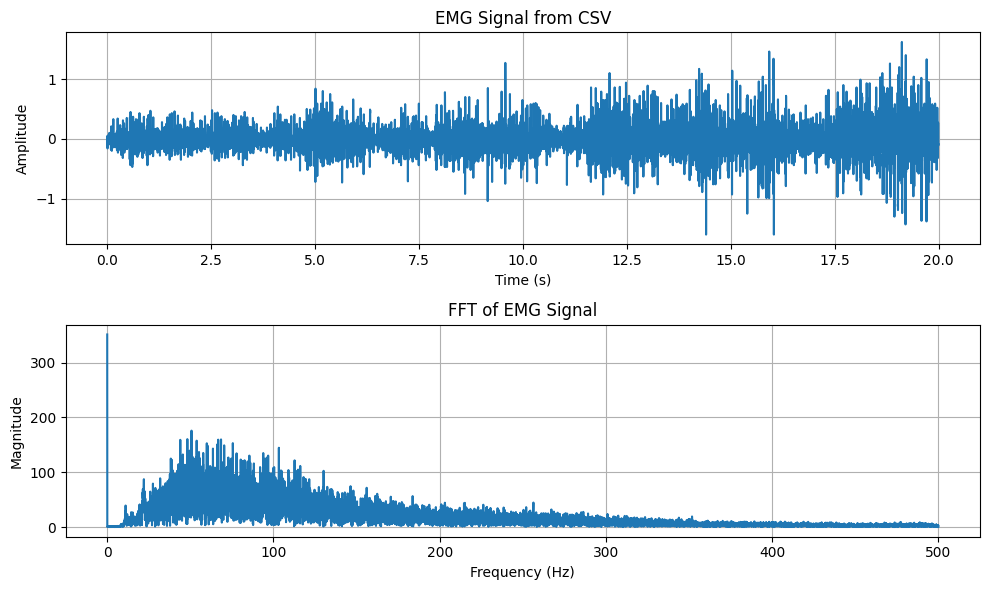

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Read the signal from the CSV file
data = pd.read_csv('Ficheiros CSV/davidji2.csv')
emg_signal = data['Raw Emg'].values.flatten()  # Assuming the column name is 'signal'

# Parameters for the signal
sampling_rate = 1000  # Adjust this according to your data
n = len(emg_signal)
t = np.linspace(0, n / sampling_rate, n, endpoint=False)

# Compute FFT and power spectrum
fft_frequencies = np.fft.rfftfreq(n, d=1/sampling_rate)
fft_magnitude = np.abs(np.fft.rfft(emg_signal))

# Plot the EMG signal
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.plot(t, emg_signal)
plt.title('EMG Signal from CSV')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid(True)

# Plot the FFT graph
plt.subplot(2, 1, 2)
plt.plot(fft_frequencies, fft_magnitude)
plt.title('FFT of EMG Signal')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.grid(True)

plt.tight_layout()
plt.show()

## FFT compute for signals that are not centered and calcualtion of mean and median frequencies

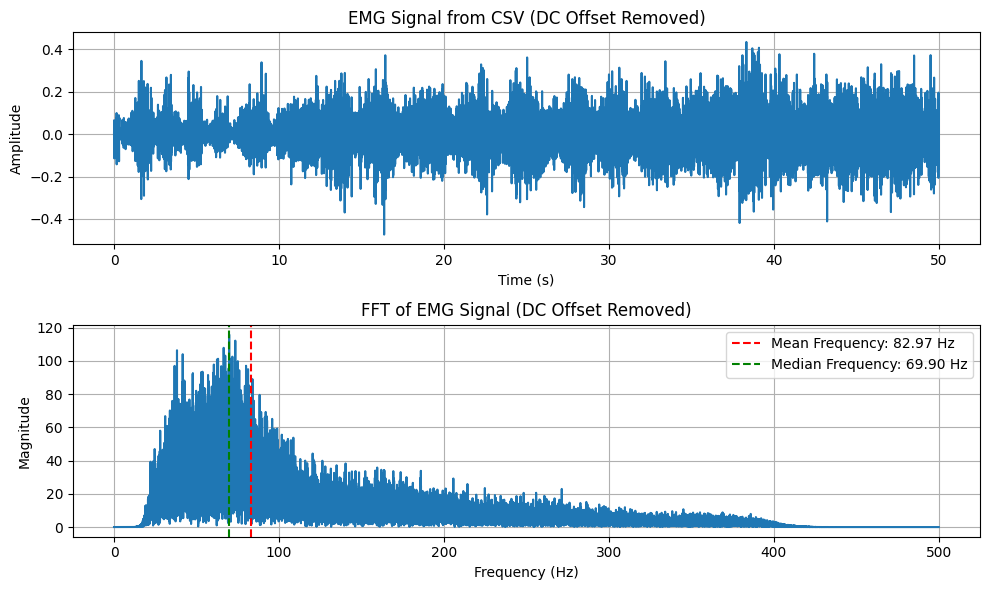

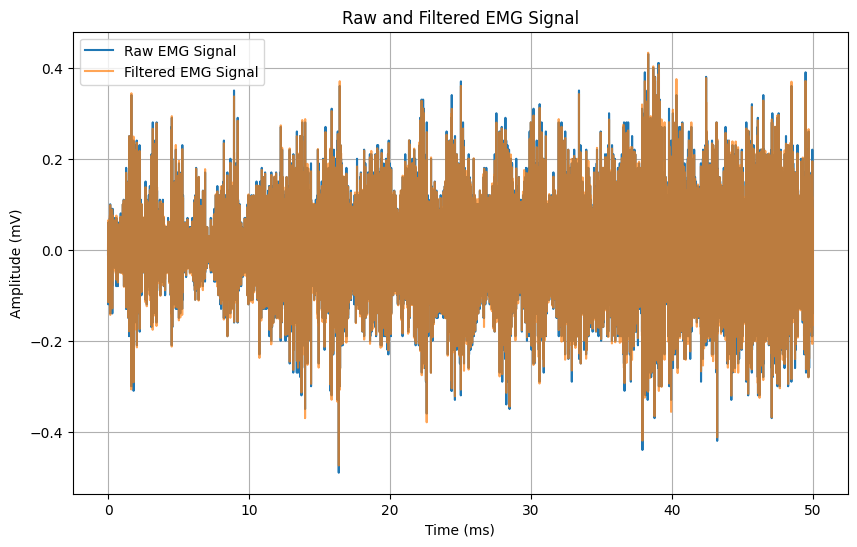

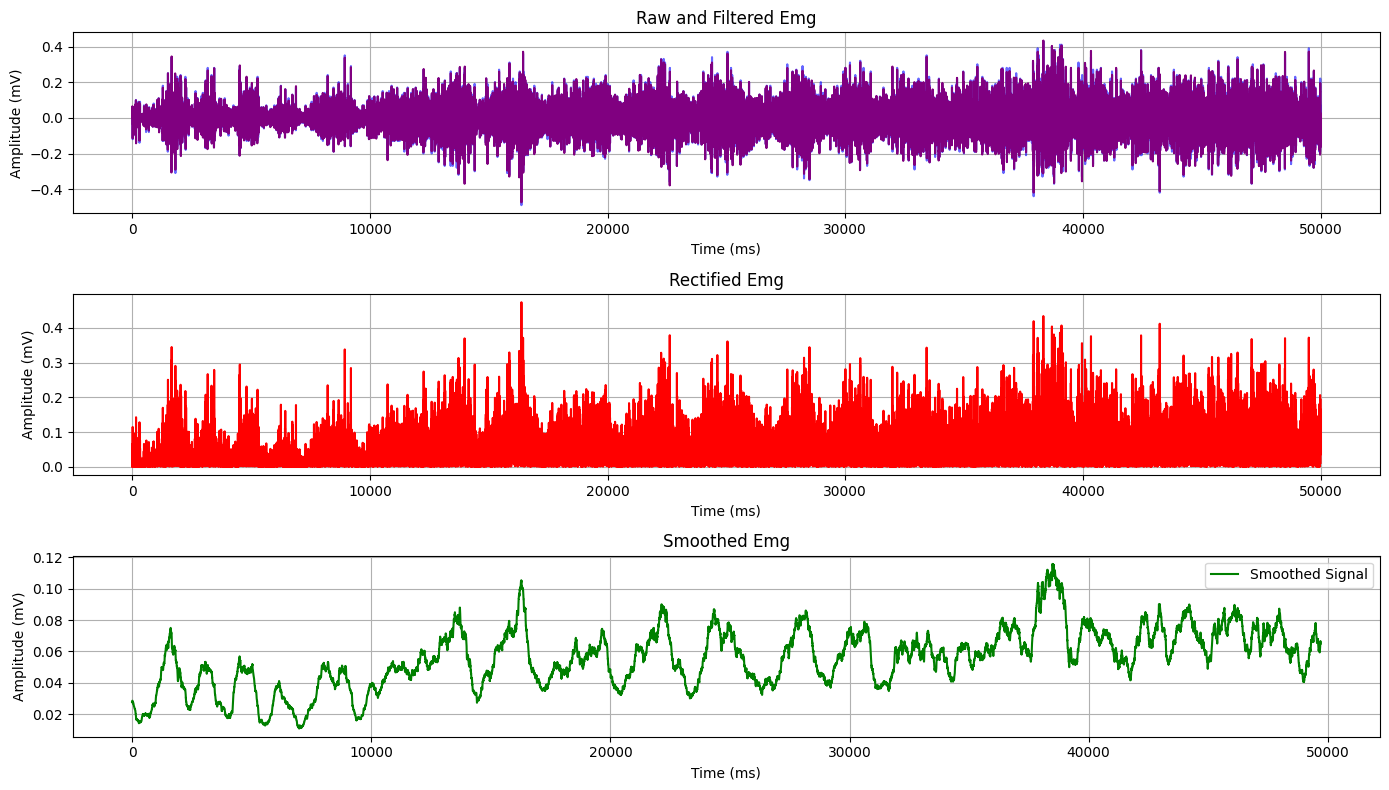

In [2]:
from aux_functions import apply_bandpass_filter, moving_average
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd

#Read the signal from the CSV file without headers
data = pd.read_csv('Trash/raw_emg.csv')
emg_signal = data['Raw Emg'].values.flatten() # Assuming the column name is 'signal'

#Remove DC offset
emg_signal_zero_mean = emg_signal - np.mean(emg_signal)
filtered_emg = apply_bandpass_filter(emg_signal_zero_mean, lowcut=20, highcut=400, fs=1000, order=6)
rectified_emg = np.abs(filtered_emg)
smoothed_signal = moving_average(rectified_emg, window_size=300)

#Parameters for the signal
sampling_rate = 1000 # Adjust this according to your data 
n = len(filtered_emg) 
t = np.linspace(0, n / sampling_rate, n, endpoint=False)

#Compute FFT and power spectrum
fft_frequencies = np.fft.rfftfreq(n, d=1/sampling_rate) 
fft_magnitude = np.abs(np.fft.rfft(filtered_emg)) 
power_spectrum = fft_magnitude ** 2

#Calculate mean frequency
mean_frequency = np.sum(fft_frequencies * power_spectrum) / np.sum(power_spectrum)

#Calculate median frequency
cumulative_power = np.cumsum(power_spectrum) 
total_power = cumulative_power[-1] 
median_frequency = fft_frequencies[np.where(cumulative_power >= total_power / 2)[0][0]]


#Plot the EMG signal
plt.figure(figsize=(10, 6)) 
plt.subplot(2, 1, 1) 
plt.plot(t, filtered_emg) 
plt.title('EMG Signal from CSV (DC Offset Removed)') 
plt.xlabel('Time (s)') 
plt.ylabel('Amplitude') 
plt.grid(True)

#Plot the FFT graph
plt.subplot(2, 1, 2) 
plt.plot(fft_frequencies, fft_magnitude) 
plt.axvline(mean_frequency, color='r', linestyle='--', label=f'Mean Frequency: {mean_frequency:.2f} Hz') 
plt.axvline(median_frequency, color='g', linestyle='--', label=f'Median Frequency: {median_frequency:.2f} Hz') 
plt.title('FFT of EMG Signal (DC Offset Removed)') 
plt.xlabel('Frequency (Hz)') 
plt.ylabel('Magnitude') 
plt.legend() 
plt.grid(True)

plt.tight_layout() 
plt.show()
# Plot the raw and filtered EMG signals
plt.figure(figsize=(10, 6))
plt.plot(t, emg_signal_zero_mean, label='Raw EMG Signal')
plt.plot(t, filtered_emg, label='Filtered EMG Signal', alpha=0.7)
plt.title('Raw and Filtered EMG Signal')
plt.xlabel('Time (ms)')
plt.ylabel('Amplitude (mV)')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(14, 8))

plt.subplot(3,1,1)
plt.plot(emg_signal_zero_mean, label="Raw Emg", color="blue", alpha=0.6)
plt.plot(filtered_emg, label="Filtered Emg", color="purple")
plt.title("Raw and Filtered Emg")
plt.xlabel("Time (ms)")
plt.ylabel("Amplitude (mV)")
plt.grid()


plt.subplot(3,1,2)
plt.plot(rectified_emg, label="Rectified", color="red")
plt.title("Rectified Emg")
plt.xlabel("Time (ms)")
plt.ylabel("Amplitude (mV)")
plt.grid()


plt.subplot(3,1,3)
plt.plot(smoothed_signal, label="Smoothed Signal", color="green")
plt.title("Smoothed Emg")
plt.xlabel("Time (ms)")
plt.ylabel("Amplitude (mV)")
plt.grid()


plt.legend()
plt.tight_layout()
plt.show()


# Results Figure




# Results Figure




/tmp/ipykernel_2981/2252589404.py:66: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


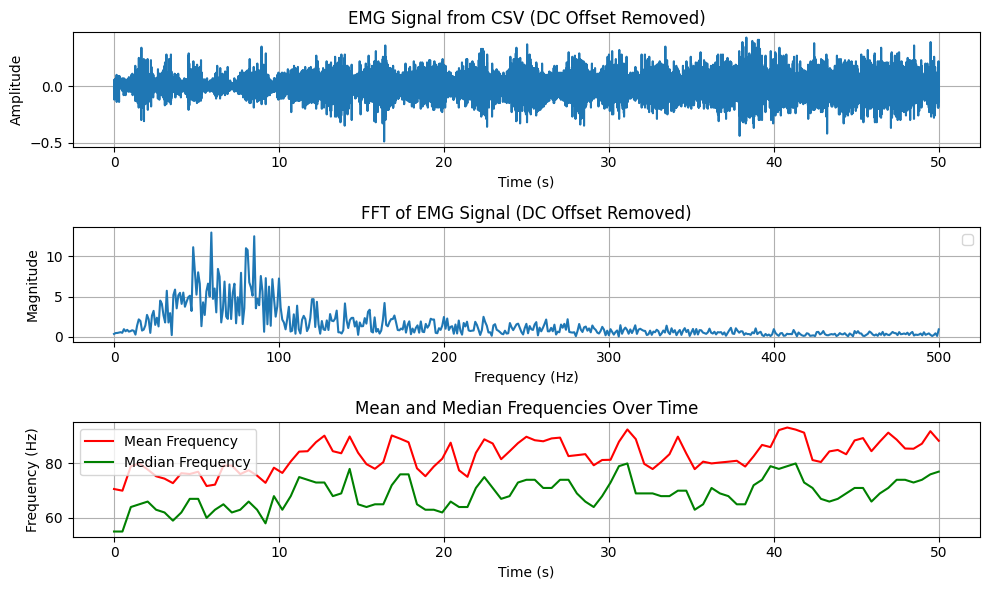

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Read the signal from the CSV file without headers
data = pd.read_csv('Trash/raw_emg.csv')
emg_signal = data['Raw Emg'].values.flatten()  # Assuming the column name is 'Raw Emg'

# Remove DC offset
emg_signal_zero_mean = emg_signal - np.mean(emg_signal)

# Parameters for the signal
sampling_rate = 1000  # Adjust this according to your data
window_size = 1000  # Window size for FFT
overlap = 0.5  # 50% overlap
step_size = int(window_size * (1 - overlap))
n = len(emg_signal_zero_mean)

# Initialize lists to store results
mean_frequencies = []
median_frequencies = []
fft_frequencies = np.fft.rfftfreq(window_size, d=1/sampling_rate)
all_fft_magnitudes = []

# Process the signal in windows
for start in range(0, n - window_size + 1, step_size):
    window = emg_signal_zero_mean[start:start + window_size]
    
    # Compute FFT and power spectrum
    fft_magnitude = np.abs(np.fft.rfft(window))
    power_spectrum = fft_magnitude ** 2
    
    # Calculate mean frequency
    mean_frequency = np.sum(fft_frequencies * power_spectrum) / np.sum(power_spectrum)
    mean_frequencies.append(mean_frequency)
    
    # Calculate median frequency
    cumulative_power = np.cumsum(power_spectrum)
    total_power = cumulative_power[-1]
    median_frequency = fft_frequencies[np.where(cumulative_power >= total_power / 2)[0][0]]
    median_frequencies.append(median_frequency)
    
    # Store FFT magnitudes
    all_fft_magnitudes.append(fft_magnitude)

# Convert lists to arrays for plotting
mean_frequencies = np.array(mean_frequencies)
median_frequencies = np.array(median_frequencies)
all_fft_magnitudes = np.array(all_fft_magnitudes)

# Plot the EMG signal
plt.figure(figsize=(10, 6))
plt.subplot(3, 1, 1)
plt.plot(np.linspace(0, n / sampling_rate, n), emg_signal_zero_mean)
plt.title('EMG Signal from CSV (DC Offset Removed)')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid(True)

# Plot the FFT graph
plt.subplot(3, 1, 2) 
plt.plot(fft_frequencies, fft_magnitude) 
plt.title('FFT of EMG Signal (DC Offset Removed)') 
plt.xlabel('Frequency (Hz)') 
plt.ylabel('Magnitude') 
plt.legend() 
plt.grid(True)

# Plot the mean and median frequencies
plt.subplot(3, 1, 3)
time_windows = np.linspace(0, n / sampling_rate, len(mean_frequencies))
plt.plot(time_windows, mean_frequencies, label='Mean Frequency', color='r')
plt.plot(time_windows, median_frequencies, label='Median Frequency', color='g')
plt.title('Mean and Median Frequencies Over Time')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

## Regressoes lineares para cada CSV


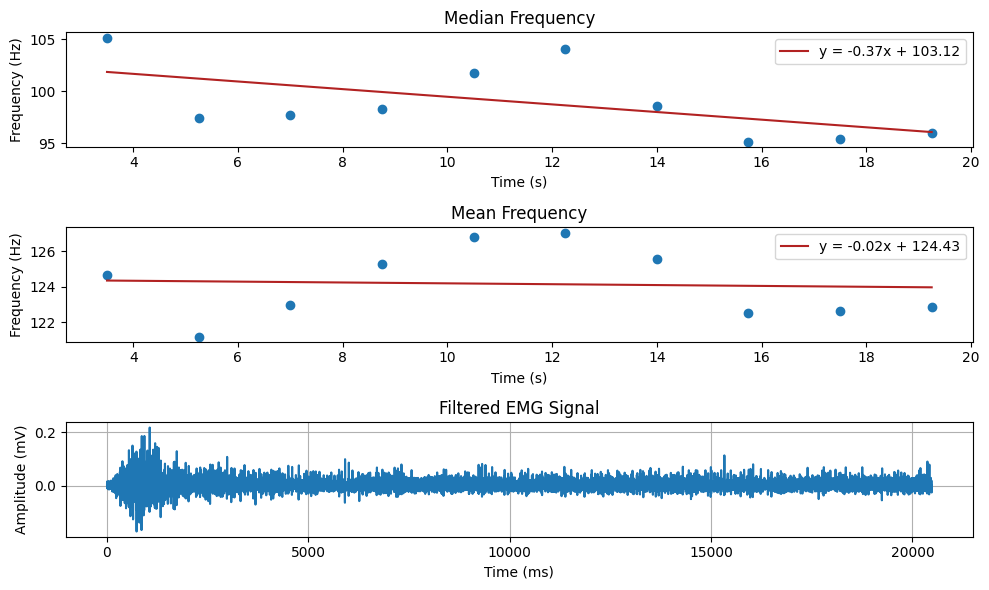

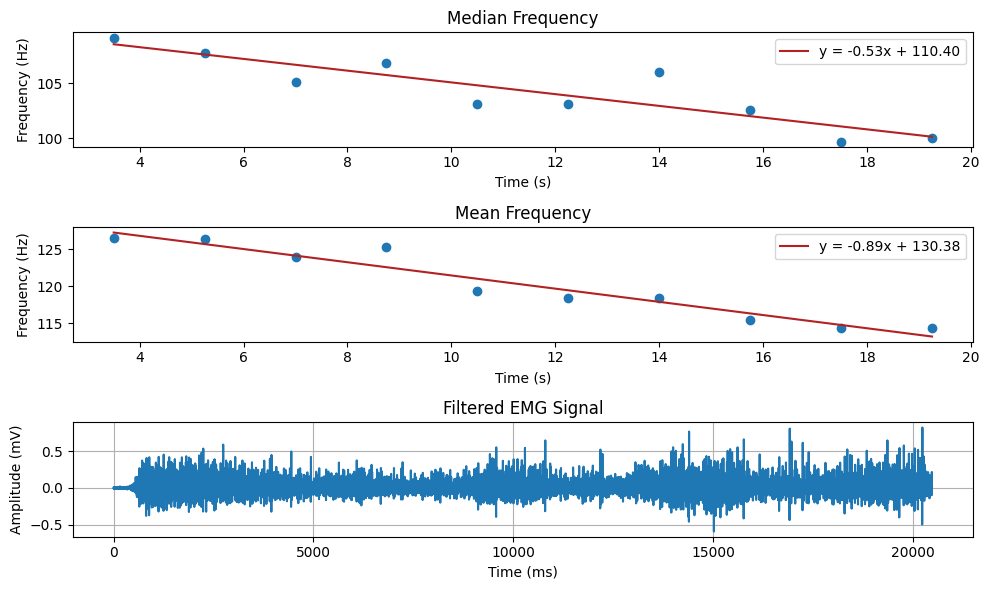

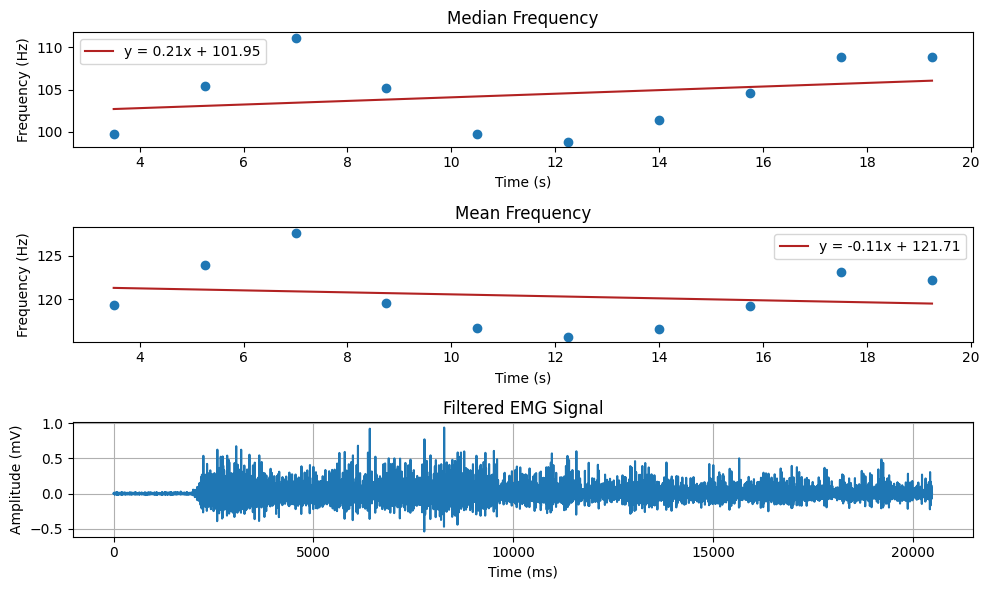

In [9]:
from sklearn.model_selection import train_test_split
from aux_functions import apply_bandpass_filter, moving_average
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd
from sklearn.linear_model import LinearRegression

csv_files = ["Ficheiros CSV/ines1.csv", "Ficheiros CSV/ines2.csv", "Ficheiros CSV/ines3.csv"]  # Replace with your actual file names
mean_frequencies = []
median_frequencies = []

for file in csv_files:
    data = pd.read_csv(file)
    emg_signal = data['Raw Emg'].values.flatten()  # Assuming the column name is 'Raw Emg'
    timestamps = data['Timestamp'].values.flatten()  # Assuming the column name is 'Timestamp'

    #Remove DC offset
    emg_signal_zero_mean = emg_signal - np.mean(emg_signal)

    filtered_emg = apply_bandpass_filter(emg_signal_zero_mean, lowcut=20, highcut=400, fs=1000, order=6)


    #Parameters for the signal
    sampling_rate = 1000 # Adjust this according to your data 
    n = len(filtered_emg) 
    t = np.linspace(0, n / sampling_rate, n, endpoint=False)


    # Parameters for windowing
    window_size = 3500  # Window size for FFT
    overlap = 0.5  # 50% overlap
    step_size = int(window_size * (1 - overlap))
    
    # Initialize lists to store results
    mean_frequencies = []
    median_frequencies = []
    window_times = []
    fft_frequencies = np.fft.rfftfreq(window_size, d=1/sampling_rate)

    
    # Process the signal in windows
    for start in range(0, n - window_size + 1, step_size):
        window = filtered_emg[start:start + window_size]
        window_times.append(start + window_size)
        # Compute FFT and power spectrum
        fft_magnitude = np.abs(np.fft.rfft(window))
        power_spectrum = fft_magnitude ** 2
        
        # Calculate mean frequency
        mean_frequency = np.sum(fft_frequencies * power_spectrum) / np.sum(power_spectrum)
        mean_frequencies.append(mean_frequency)
        
        # Calculate median frequency
        cumulative_power = np.cumsum(power_spectrum)
        total_power = cumulative_power[-1]
        median_frequency = fft_frequencies[np.where(cumulative_power >= total_power / 2)[0][0]]
        median_frequencies.append(median_frequency)
        
    #Compute FFT and power spectrum
    window_times = np.array(window_times) / 1000


    Median_Array = np.column_stack((window_times, median_frequencies))
    X = Median_Array[:,0]
    X = X.reshape(-1, 1)
    Y = Median_Array[:,1]
    Mean_Array = np.column_stack((window_times, mean_frequencies))
    X_2 = Mean_Array[:,0]
    X_2 = X_2.reshape(-1, 1)
    Y_2 = Mean_Array[:,1]
    

    #Compute Linear regressions
    regressor_1 = LinearRegression()
    regressor_1.fit(X, Y)

    regressor_2 = LinearRegression()
    regressor_2.fit(X_2, Y_2)


    y_pred = regressor_1.predict(X)
    y_pred_2 = regressor_2.predict(X_2)
    
    #Plot the EMG signal
    plt.figure(figsize=(10, 6)) 
    plt.subplot(3, 1, 1) 
    plt.scatter(window_times, median_frequencies)
    slope1 = regressor_1.coef_[0]
    intercept1 = regressor_1.intercept_
    equation1 = f'y = {slope1:.2f}x + {intercept1:.2f}'
    plt.plot(X, y_pred, color='firebrick', label=equation1)
    plt.legend()
    plt.title('Median Frequency') 
    plt.xlabel('Time (s)') 
    plt.ylabel('Frequency (Hz)') 
    plt.grid(False)

    plt.subplot(3, 1, 2)
    plt.scatter(window_times, mean_frequencies)
    slope2 = regressor_2.coef_[0]
    intercept2 = regressor_2.intercept_
    equation2 = f'y = {slope2:.2f}x + {intercept2:.2f}'
    plt.plot(X_2, y_pred_2, color='firebrick', label=equation2)
    plt.legend()  # Add this line to show the label
    plt.title('Mean Frequency')
    plt.xlabel('Time (s)')
    plt.ylabel('Frequency (Hz)')
    plt.grid(False)

    plt.subplot(3, 1, 3)
    plt.plot(timestamps, filtered_emg)
    plt.title('Filtered EMG Signal')
    plt.xlabel('Time (ms)')
    plt.ylabel('Amplitude (mV)')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

## Regressao linear para todos os ficheiros juntos 


Ficheiros CSV/davidji1.csv used a window size of 1000
Ficheiros CSV/davidji2.csv used a window size of 3000
Ficheiros CSV/davidji3.csv used a window size of 3500
Ficheiros CSV/ines1.csv used a window size of 3000
Ficheiros CSV/ines2.csv used a window size of 3000
Ficheiros CSV/ines3.csv used a window size of 3500
Ficheiros CSV/sofy.csv used a window size of 3000
Ficheiros CSV/sofyfm.csv used a window size of 1000
Ficheiros CSV/neli.csv used a window size of 5000
Ficheiros CSV/maryfm.csv used a window size of 1000
Ficheiros CSV/manel.csv used a window size of 5000


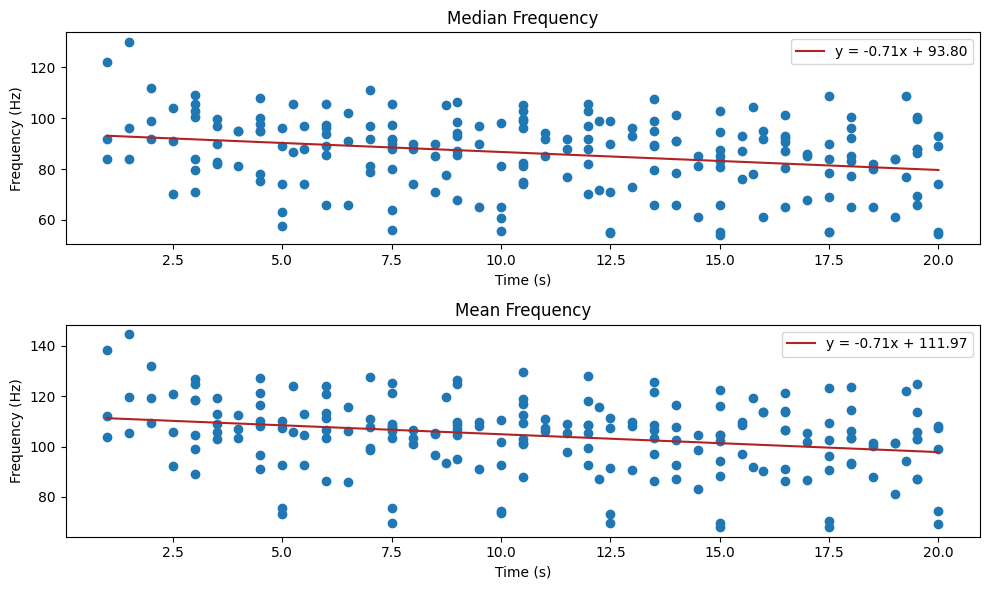

In [39]:
from sklearn.model_selection import train_test_split
from aux_functions import apply_bandpass_filter, moving_average
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd
from sklearn.linear_model import LinearRegression

csv_files = ["Ficheiros CSV/davidji1.csv", "Ficheiros CSV/davidji2.csv", "Ficheiros CSV/davidji3.csv", "Ficheiros CSV/ines1.csv", "Ficheiros CSV/ines2.csv", "Ficheiros CSV/ines3.csv", "Ficheiros CSV/sofy.csv", "Ficheiros CSV/sofyfm.csv", "Ficheiros CSV/neli.csv", "Ficheiros CSV/maryfm.csv", "Ficheiros CSV/manel.csv"]  # Replace with your actual file names
mean_frequencies = []
median_frequencies = []
window_times = []
sizes=[1000,5000,3000,3500]

for file in csv_files:
    data = pd.read_csv(file)
    emg_signal = data['Raw Emg'].values.flatten()  # Assuming the column name is 'Raw Emg'
    timestamps = data['Timestamp'].values.flatten()  # Assuming the column name is 'Timestamp'
    #Remove DC offset
    emg_signal_zero_mean = emg_signal - np.mean(emg_signal)
    filtered_emg = apply_bandpass_filter(emg_signal_zero_mean, lowcut=20, highcut=400, fs=1000, order=6)
    rectified_emg = np.abs(filtered_emg)
    smoothed_signal = moving_average(rectified_emg, window_size=3)

    #Parameters for the signal
    sampling_rate = 1000 # Adjust this according to your data 
    n = len(filtered_emg) 
    t = np.linspace(0, n / sampling_rate, n, endpoint=False)

    # Parameters for windowing
    window_size = 5000  # Window size for FFT
    overlap = 0.5  # 50% overlap
    window_size = np.random.choice(sizes)
    step_size = int(window_size * (1 - overlap))
    print(f"{file} used a window size of {window_size}")
    
    # Initialize lists to store results
    
    fft_frequencies = np.fft.rfftfreq(window_size, d=1/sampling_rate)

    
    # Process the signal in windows
    for start in range(0, n - window_size + 1, step_size):
        window = filtered_emg[start:start + window_size]
        window_times.append(start + window_size)
        # Compute FFT and power spectrum
        fft_magnitude = np.abs(np.fft.rfft(window))
        power_spectrum = fft_magnitude ** 2
        
        # Calculate mean frequency
        mean_frequency = np.sum(fft_frequencies * power_spectrum) / np.sum(power_spectrum)
        mean_frequencies.append(mean_frequency)
        
        # Calculate median frequency
        cumulative_power = np.cumsum(power_spectrum)
        total_power = cumulative_power[-1]
        median_frequency = fft_frequencies[np.where(cumulative_power >= total_power / 2)[0][0]]
        median_frequencies.append(median_frequency)
        
#Compute FFT and power spectrum
window_times = np.array(window_times) / 1000


Median_Array = np.column_stack((window_times, median_frequencies))
X = Median_Array[:,0]
X = X.reshape(-1, 1)
Y = Median_Array[:,1]
Mean_Array = np.column_stack((window_times, mean_frequencies))
X_2 = Mean_Array[:,0]
X_2 = X_2.reshape(-1, 1)
Y_2 = Mean_Array[:,1]


#Compute Linear regressions
regressor_1 = LinearRegression()
regressor_1.fit(X, Y)

regressor_2 = LinearRegression()
regressor_2.fit(X_2, Y_2)


y_pred = regressor_1.predict(X)
y_pred_2 = regressor_2.predict(X_2)

#Plot the EMG signal
plt.figure(figsize=(10, 6)) 
plt.subplot(2, 1, 1) 
plt.scatter(window_times, median_frequencies)
slope1 = regressor_1.coef_[0]
intercept1 = regressor_1.intercept_
equation1 = f'y = {slope1:.2f}x + {intercept1:.2f}'
plt.plot(X, y_pred, color='firebrick', label=equation1)
plt.legend()
plt.title('Median Frequency') 
plt.xlabel('Time (s)') 
plt.ylabel('Frequency (Hz)') 
plt.grid(False)

plt.subplot(2, 1, 2)
plt.scatter(window_times, mean_frequencies)
slope2 = regressor_2.coef_[0]
intercept2 = regressor_2.intercept_
equation2 = f'y = {slope2:.2f}x + {intercept2:.2f}'
plt.plot(X_2, y_pred_2, color='firebrick', label=equation2)
plt.legend()  # Add this line to show the label
plt.title('Mean Frequency')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.grid(False)
plt.tight_layout()
plt.show()